# CMSE 202: Semester Group Project

<img src="https://as2.ftcdn.net/jpg/01/24/40/79/500_F_124407905_i8wEGGzf7YVSMkl3aNt0QPnUPe62T0j1.jpg" width=400px>

**Section:** 003

**Group Members:** 
* Himali Bhandar:Model 
* Amanda Bowerman: Model
* Blake Stewart: Speech processing- Monday 4/6 
* Jalin Lewis: Results 
* Matthew Sitto: Control variables dataframe (data collection)- Monday 4/6
* Riley Latham: Speech Processing  - Monday 4/6
* Alexis Morse: Results


## Statement of the Problem

#### **How much, quantitatively, do the presidential election debates affect the outcome of a presidential election?**


## Solution


As a group, we have decided to investigate US Presidential debates' speeches from the years 2000 to 2016 and the actual effect of these speeches on the results of President Elections. 

To quantitatively use the speeches we found online, we decided to do Sentiment Analysis on these speeches. The goal for this step was to determine the words in these speeches which had positive and negative connotations associated with them. The total number of positive and negative words in each speech would be used for sentiment analysis later on.
We also collected data on these candidates' political party affiliations, election result, campaign spending, favorability rating (based off of the popular vote), and the voting-eligible population turnout for each election. 

For the modeling section of the project, we decided to a K-nearest Classifier Machine Learning model. We wanted this program to learn to associate the total number of positive and negative words and the result of election together and to determine if having either more positive or negative numbers would affect the result or not. 

After the analysis, we displayed our results using graphs and print statements. 

*Note: Most of the code applied in this notebook has been imported via python files. This was done because each section of the coding project was assigned to a few people in the group. We will be displaying some sample code and print statements in this notebook to show how our code generally worked. For more detailed understanding of the code, please refer to the python files submitted along with this notebook.* 

## Data - Riley, Blake and Matt

In [1]:
# Import necessary python packages
import pandas as pd
import numpy as np
import nltk

# Expected to return a True Value
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/himalibhandari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

This section of the project notebook includes our method of collecting, cleaning, and processing our data through sentiment analyis techniques. We will begin with providing the process in which we collected presidential debate transcripts from the 2000-2016 elections. We then pulled all of the positive and negative sentiment from each candidate and used them as predictors for our classification algorithim on predicting if the candidate won the election. This data will be paired with control data such as candidate's favorability rating, political affiliation, campaign financials, and the voting-eligible population turnout for each election.

### Part 0: Import Speech Data

## Model 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from control_variables import create_data
from data_12_16 import return_sentiment
from data_00_08 import return_sentiment2
from sklearn.neighbors import KNeighborsClassifier  
from scipy.spatial.distance import euclidean
from scipy.stats import mode
from sklearn.metrics import accuracy_score
import nltk
from sklearn.preprocessing import StandardScaler

This section describes the Machine Learning method of K-nearest Classifier method we applied to the Election Data and the other control variables from the previous section. 

We wanted the model to learn to associate the total number of positive words and negative words from a candidate's Presidential debate speeches in a particular year and the control factors including favorability rating, political affiliation, campaign financials, and the voting-eligible population turnout for each election with the election result of that respective year 

## Conclusions - Everyone

Some issues we might run into are:

* Finding proper data without any inconsistencies for both the speeches and approval rates.
* Deciding on an appropriate pre-defined sentiment.
* Likely issues in the actual word processing. 



In [8]:
from Machine_Learning_KNN1 import predict
import matplotlib.pyplot as plt
import numpy as np

In [20]:
ypredict, accuracy_k, ytest = predict(3,0.4)

In [21]:
print(ypredict)

['L' 'L' 'L' 'L']


['W', 'W', 'W'] ['L']


<BarContainer object of 1 artists>

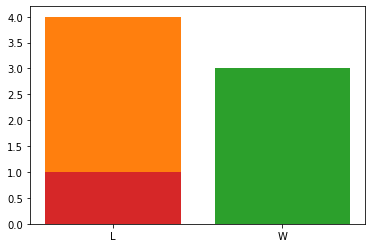

In [26]:
height1 = len(ypredict)
height2 = len(ytest)
wins_predict = []
loss_predict = []
win_count = 0
loss_count = 0
win_test = []
loss_test = []
win_count_test = 0
loss_count_test = 0

for i in ypredict:
    if i == "W":
        win_count+=1
        wins_predict.append(i)
    else:
        loss_count +=1
        loss_predict.append(i)
for j in ytest:
    if j == "W":
        win_count_test+=1
        win_test.append(j)
    else:
        loss_count_test+=1
        loss_test.append(j)

        


plt.bar(wins_predict,win_count)
plt.bar(loss_predict, loss_count)
plt.bar(win_test,win_count_test)
plt.bar(loss_test,loss_count_test)

In [27]:
print(ytest)

['W', 'W', 'L', 'W']


In [28]:
print(accuracy_k)

[]


<BarContainer object of 1 artists>

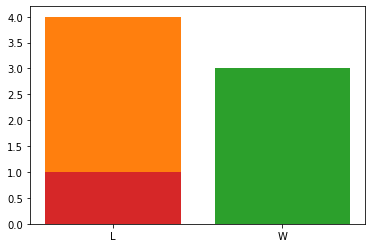

In [29]:
accuracy_k = []
accuracy_ts = []
k = [1,2,3,4,5]
test_size = [0.1,0.2,0.4,0.5,0.7]
y_predict = []
plt.bar(wins_predict,win_count)
plt.bar(loss_predict, loss_count)
plt.bar(win_test,win_count_test)
plt.bar(loss_test,loss_count_test)

## References

* “Debate Transcripts.” CPD: Debate Transcripts, www.debates.org/voter-education/debate-transcripts/.
* “Election Listing: The American Presidency Project.” Election Listing | The American Presidency Project, www.presidency.ucsb.edu/statistics/elections.
* “Data Archive.” Data Archive | The American Presidency Project, www.presidency.ucsb.edu/statistics/data.
* Approval ratings (RealClearPolitics): https://www.realclearpolitics.com/epolls/2008/president/us/general_election_mccain_vs_obama-225.html
* Approval ratings (WikiWand): https://www.wikiwand.com/en/United_States_presidential_approval_rating#/Historical_comparison